In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/anna/Downloads/vacancies.xlsx')

In [3]:
df.head()

,vacancy_id,employer_id,vacancy_type,region_name,district_name,creation_date,archivation_date
0,7559095.0,1.0,STANDART,Вологодская область,СЗФО,2020-06-18,2020-07-18
1,7418926.0,2.0,STANDART PLUS,Вологодская область,СЗФО,2020-06-09,2020-07-09
2,7387535.0,3.0,STANDART PLUS,Вологодская область,СЗФО,2020-06-08,2020-07-08
3,7487656.0,4.0,STANDART,Вологодская область,СЗФО,2020-06-15,2020-07-15
4,7379218.0,5.0,STANDART,Кабардино-Балкарская республика,СКФО,2020-06-07,2020-07-07


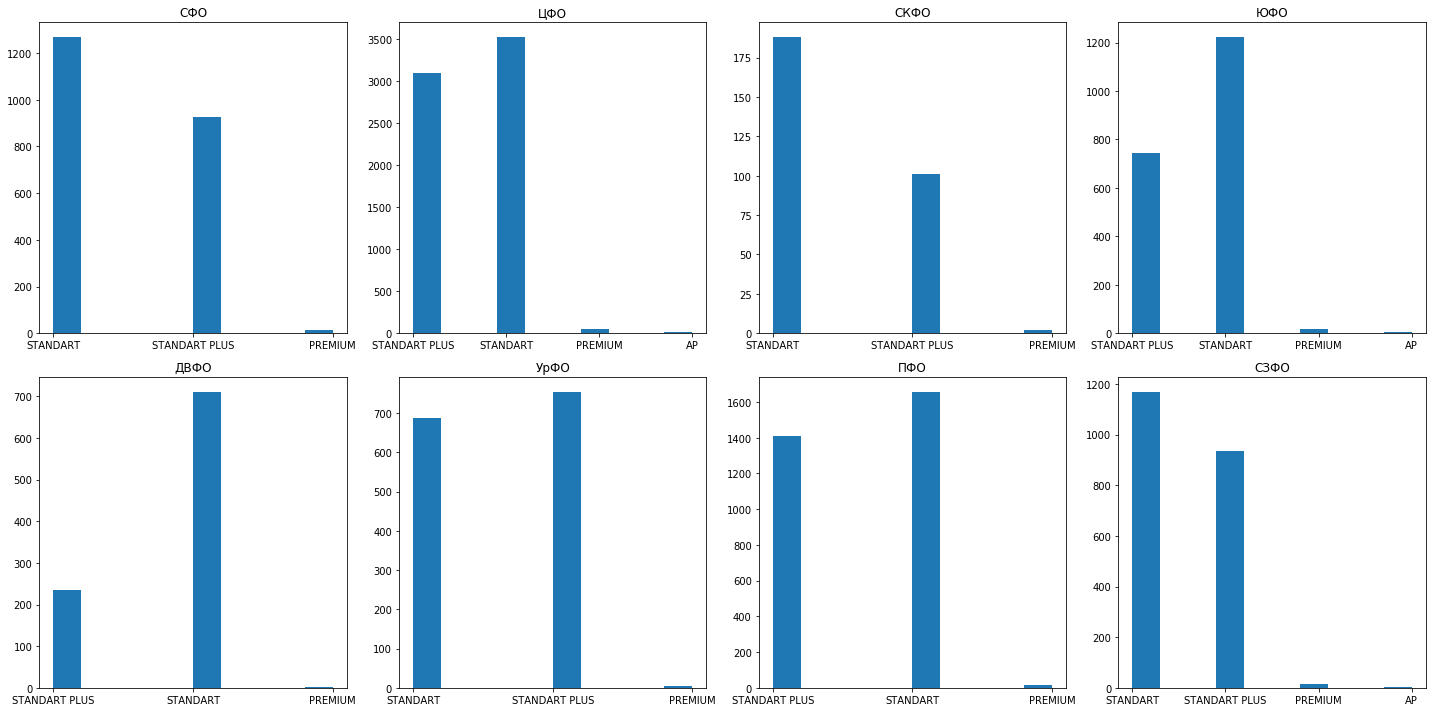

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20,10), tight_layout=True)
i = 0
j = 0
proportion_plus = []
district_names = set(df['district_name'])
district_names = list({x for x in district_names if pd.notna(x)})
df_june = df[(df['creation_date'].dt.month==6) | (df['archivation_date'].dt.month==6)]

for district in district_names:
    df_june_district = df_june[df_june['district_name']==district]
    axs[i][j].hist(df_june_district['vacancy_type'])
    axs[i][j].set_title(district)
    j+=1
    if j == 4:
        j = 0
        i += 1
    proportion_plus.append(df_june_district[df_june_district['vacancy_type']=='STANDART PLUS'].shape[0] / df_june_district.shape[0])

In [16]:
june_district_statistic = np.column_stack((district_names, proportion_plus))
june_district_statistic = june_district_statistic[june_district_statistic[:,1].argsort()]

print('Max = %s \nMin = %s' % (june_district_statistic[-1][0], june_district_statistic[0][0]))

Max = УрФО 
Min = ДВФО


In [6]:
df_moscow = df[df['region_name']=='Москва']
moscow_employer, moscow_vacancy = np.unique(df_moscow['employer_id'], return_counts=True)
moscow_employer_statistic = np.column_stack((moscow_employer.astype(np.int32), moscow_vacancy.astype(np.int32)))
moscow_employer_statistic = moscow_employer_statistic[moscow_employer_statistic[:,1].argsort()]
print('Lider employer: %s' % moscow_employer_statistic[-1][0])

df_moscow_employer = df_moscow[df_moscow['employer_id']==moscow_employer_statistic[-1][0]]
lider_vacancy_type = np.column_stack((np.unique(df_moscow_employer['vacancy_type'], return_counts=True)))
lider_vacancy_type = lider_vacancy_type[lider_vacancy_type[:,1].argsort()]
print('Priority vacancy type: %s' % lider_vacancy_type[-1][0])

Lider employer: 1222
Priority vacancy type: STANDART


In [7]:
employer, vacancy = np.unique(df['employer_id'], return_counts=True)
employer_statistic = np.column_stack((employer.astype(np.int32), vacancy.astype(np.int32)))
employer_statistic = pd.DataFrame((employer_statistic[employer_statistic[:,1].argsort()]), columns=['employer', 'vacancy'])
print('Percent of employer: %s%%' % round(employer_statistic[employer_statistic['vacancy']>1].shape[0] * 100 / employer_statistic.shape[0], 2))

Percent of employer: 16.98%


Percentile delta time

PREMIUM: 14.2 days
STANDART: 6.0 days
STANDART PLUS: 11.0 days
AP: 30.0 days


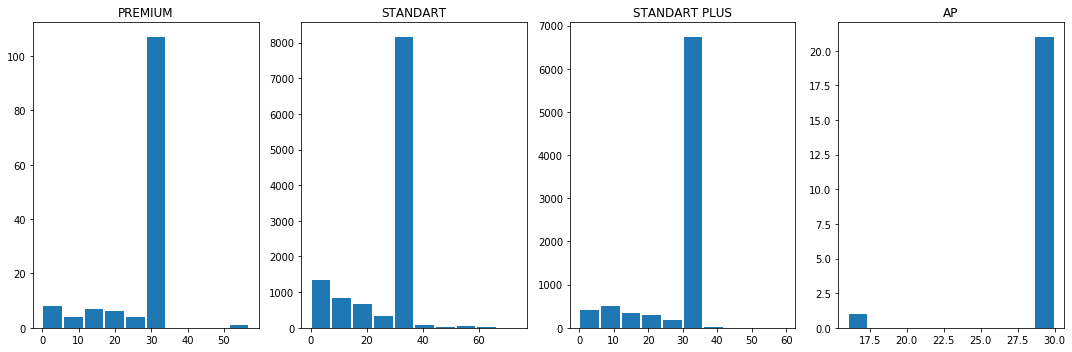

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(15,5), tight_layout=True)
i = 0

df['life_vacancy_time'] = (df['archivation_date'] - df['creation_date']).dt.days
vacancy_type = set(df['vacancy_type'])
vacancy_type = list({x for x in vacancy_type if pd.notna(x)})
print('Percentile delta time\n')
for vacancy in vacancy_type:
    df_vacancy = df[df['vacancy_type']==vacancy]
    axs[i].hist(df_vacancy['life_vacancy_time'], bins=10, rwidth=0.9)
    axs[i].set_title(vacancy)
    i+=1
    print('%s: %s days' % (vacancy, round(np.percentile(df_vacancy['life_vacancy_time'], 10, interpolation='linear'), 2)))